<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/T2_Control_Chart_n%3D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code demonstrates how you can plot T2 Control Chart when n=1.
Note that this code should work for the Phase I of the control charting.
The control limits should be adjusted for the Phase II charting.

In [ ]:
# Import required libraries
from scipy.stats import beta
from scipy.stats import f
from scipy.stats import multivariate_normal
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-colorblind')

In [ ]:
# retrive data for Drug Effect data k=3
data = pd.read_csv('https://raw.githubusercontent.com/changsksu/K-State-IMSE641/master/Hotelling_T2.csv', sep=',', na_values=".")
#generate the Phase I data using filter
#use the first 18 observations to setup the control charts
dataI= [data[['Fever', 'Pressure', 'Aches']][data['ID'] == "Placebo"]]

#retrieve the Phase II data
dataII= [data[['Fever', 'Pressure', 'Aches']][data['ID'] == "Drug"]]

#all data points; the data type is a list
dataAll=[data[['Fever', 'Pressure', 'Aches']]]

dataI

[    Fever  Pressure  Aches
 0    40.9        54     14
 1    39.5        75     18
 2    39.4        57     24
 3    38.2        71     24
 4    39.7        65     22
 5    38.9        49     30
 6    38.6        58     25
 7    39.9        52     17
 8    41.3        62     18
 9    38.1        57     20
 10   39.6        78     19
 11   37.1        92     15
 12   39.5        63     13
 13   40.3        52     25
 14   41.5        46     27
 15   39.3        56     14
 16   37.6        86     16
 17   40.6        48     21]

In [ ]:
# this np.reshape convert the list dataI into the proper subgroup and m=30
# sample size n=5 is used for X-bar and R or X-bar and S chart
x1=np.reshape(dataI, (18,3))
x1

array([[40.9, 54. , 14. ],
       [39.5, 75. , 18. ],
       [39.4, 57. , 24. ],
       [38.2, 71. , 24. ],
       [39.7, 65. , 22. ],
       [38.9, 49. , 30. ],
       [38.6, 58. , 25. ],
       [39.9, 52. , 17. ],
       [41.3, 62. , 18. ],
       [38.1, 57. , 20. ],
       [39.6, 78. , 19. ],
       [37.1, 92. , 15. ],
       [39.5, 63. , 13. ],
       [40.3, 52. , 25. ],
       [41.5, 46. , 27. ],
       [39.3, 56. , 14. ],
       [37.6, 86. , 16. ],
       [40.6, 48. , 21. ]])

In [ ]:
# compute column means
np.mean(x1, axis=0)

array([39.44444444, 62.27777778, 20.11111111])

In [ ]:
# compute the covariance matrix
matcov1 = np.cov(x1.T)
matcov1

array([[  1.49673203, -10.43071895,   0.64771242],
       [-10.43071895, 175.15359477, -28.5620915 ],
       [  0.64771242, -28.5620915 ,  24.45751634]])

In [ ]:
# compute the inverse of the covariance matrix
matinv1 = np.linalg.inv(matcov1)
matinv1

array([[1.22019635, 0.08324902, 0.0649056 ],
       [0.08324902, 0.01273202, 0.01266407],
       [0.0649056 , 0.01266407, 0.05395774]])

In [ ]:
class Tsquare_single:

    _title = "T-square Hotelling Chart"

    def fit(self, data, size, newdata=None):

        self.data = np.array(data)
        self.numsample = len(data)
        self.size=size

        colmean = np.mean(data, axis=0)
        matcov = np.cov(data.T)
        matinv = np.linalg.inv(matcov)

        values = []
        for sample in data:
            dif = sample - colmean
            value = matinv.dot(dif.T).dot(dif)
            values.append(value)
        
        self.T2=values
        self.cl = ((self.numsample - 1)**2) / self.numsample
        self.lcl = self.cl * beta.ppf(0.00135, self.size / 2, (self.numsample - self.size - 1) / 2)
        self.center = self.cl * beta.ppf(0.5, self.size / 2, (self.numsample - self.size - 1) / 2)
        self.ucl = self.cl * beta.ppf(0.99865, self.size / 2, (self.numsample - self.size - 1) / 2)

        #return (values, center, lcl, ucl, self._title)

    def ControlChart(self):
        ucl = np.zeros(self.numsample)
        lcl = np.zeros(self.numsample)
              
        for i in range(len(self.data)):
            lcl[i] = self.cl * beta.ppf(0.00135, self.size / 2, (self.numsample - self.size - 1) / 2)
            ucl[i] = self.cl * beta.ppf(0.99865, self.size / 2, (self.numsample - self.size - 1) / 2)
              
        plt.figure(figsize=(15,5))
        plt.plot(self.T2,marker="o",color="k",label="T2")
        plt.plot([self.center]*self.numsample,color="k",alpha=0.35)
        plt.plot(ucl,color="r",label="UCL {}".format(ucl[len(ucl)-1].round(2)))
        plt.plot(lcl,color="r",label="LCL {}".format(lcl[len(lcl)-1].round(2)))
        plt.title("T2 Conrol Chart with n=1")
        plt.legend(loc="upper left")
        plt.show()


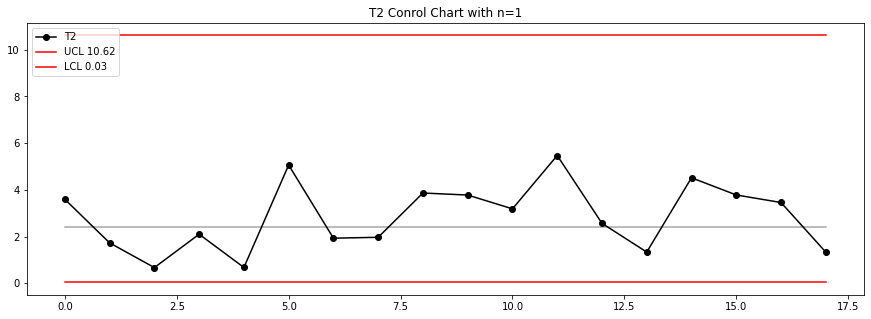

In [ ]:
# This chart is for Phase I or Phase II assuming all mean and sigma are estimated
# In this block, only Phase I data is plotted
# size is the number of variables
chart = Tsquare_single()
chart.fit(data=x1, size=3)
chart.ControlChart()

# **Now we will use the mean and sigma estimated from the Phase I process above and plot all data**

Your turn: how do you control the mean and std so that only the Phase I data is used? Note that the following chart should use the same control limits as the phase I chart.

In [ ]:
# all data is converted into a proper matrix
x2=np.reshape(dataAll, (38,3))

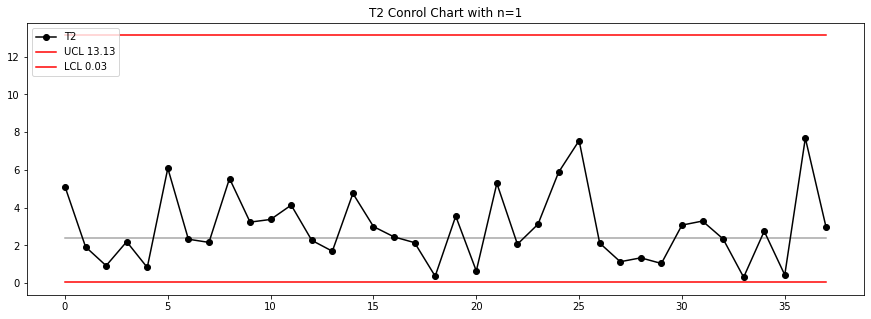

In [ ]:
chart = Tsquare_single()
chart.fit(data=x2, size=3)
chart.ControlChart()